In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df.shape

(50000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
#flight day
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.flight_day.value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

In [ ]:
df.sales_channel.value_counts().values[0]

44382

In [ ]:
df.sales_channel.value_counts().values[1]

5618

In [ ]:
#Sales Channel
per_internet = df.sales_channel.value_counts().values[0] / df.sales_channel.count() * 100
per_mobile = df.sales_channel.value_counts().values[1] / df.sales_channel.count() * 100

print(f'bookings via internet: {per_internet} %')
print(f'bookings via phone call: {per_mobile} %')

bookings via internet: 88.764 %
bookings via phone call: 11.236 %


In [ ]:
#Trip channel
per_round = df.trip_type.value_counts().values[0] / df.trip_type.count() * 100
per_oneway = df.trip_type.value_counts().values[1] / df.trip_type.count() * 100
per_circle = df.trip_type.value_counts().values[2] / df.trip_type.count() * 100

print(f'percentage of round trips: {per_round} %')
print(f'percentage of one way trips: {per_oneway} %')
print(f'percentage of circle trips: {per_circle} %')

percentage of round trips: 98.994 %
percentage of one way trips: 0.774 %
percentage of circle trips: 0.232 %


<Axes: xlabel='purchase_lead', ylabel='Count'>

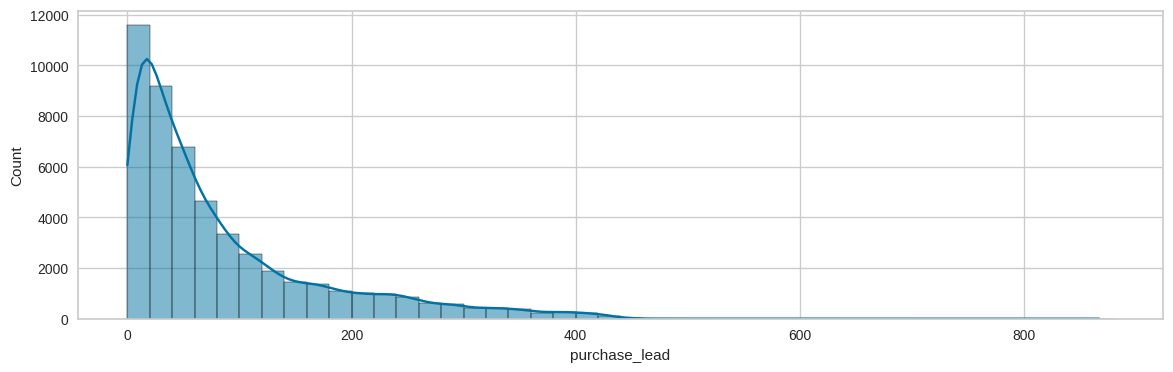

In [ ]:
#Purchase lead
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,4))
sns.histplot(data=df, x='purchase_lead', binwidth=20, kde=True)

This shows how the data is spread out.The airline keeps tickets for rebooking within a year and from the data there are few bookings done more that 2 years before travel date( it's unlikely that they are advance tickets) so the most obvious reason is cancellation or rebooking in a period of 6 months for twice.

In [ ]:
(df.purchase_lead > 600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [ ]:
#We remove bookings done more than 1 and half years ago ie 600 days
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,5,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,4,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,5,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,1,KIXMLE,Japan,0,0,1,7.00,1


In [ ]:
df = df[df.purchase_lead < 600]
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


<Axes: xlabel='length_of_stay', ylabel='Count'>

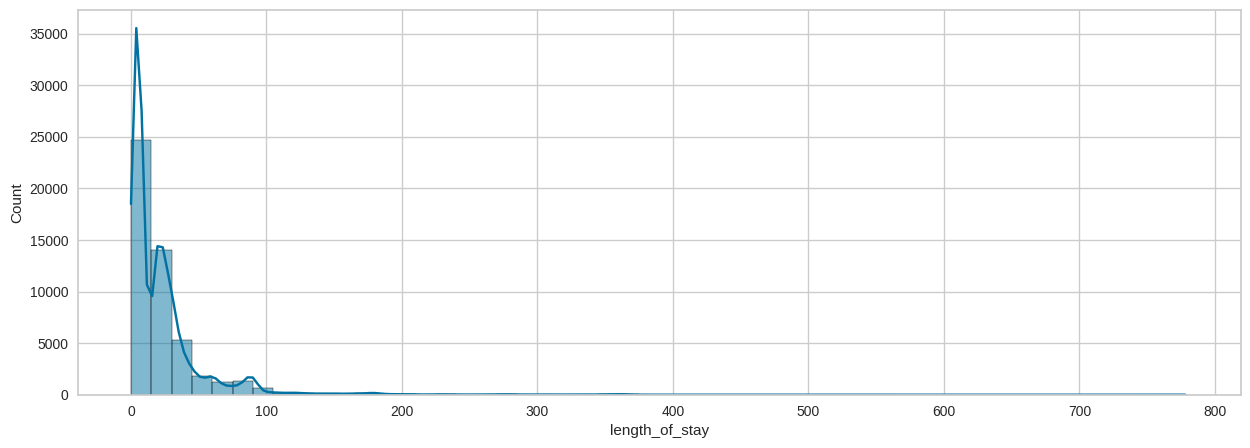

In [ ]:
#length of stay
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='length_of_stay', binwidth=15, kde=True)

In [ ]:
(df.length_of_stay > 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

279 exceeded their length of stay

In [ ]:
df[df.length_of_stay > 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [ ]:
df = df[df.length_of_stay < 500]

Text(0, 0.5, 'Number of complete bookings')

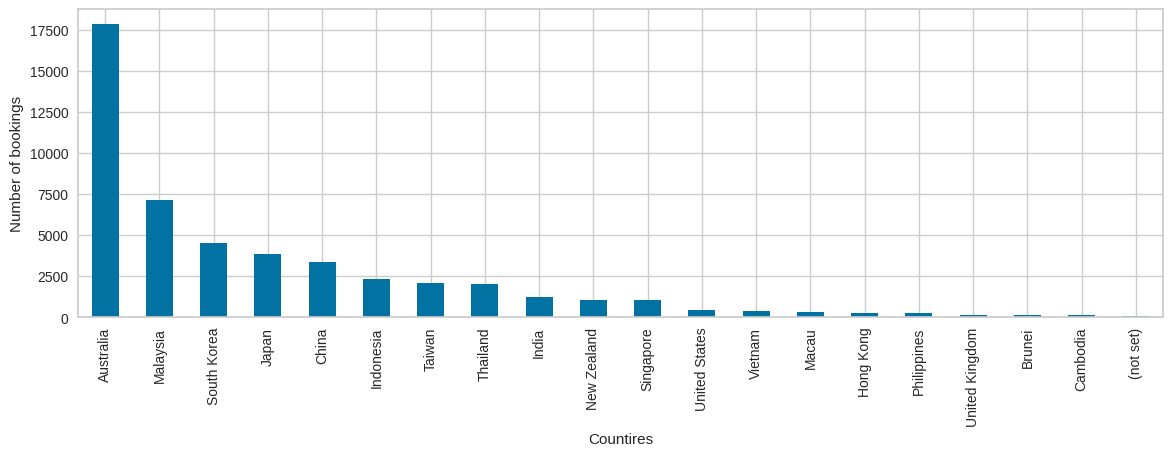

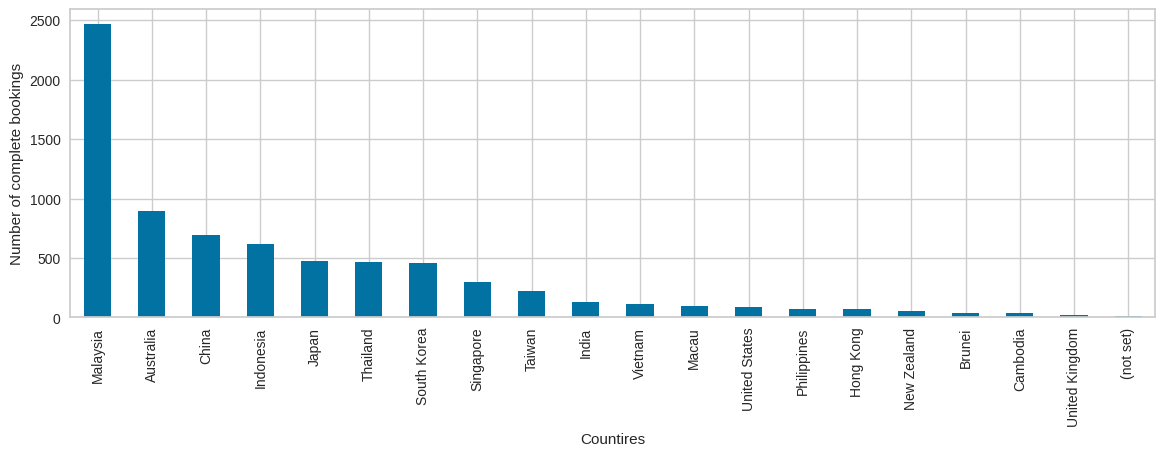

In [ ]:
#booking origin
plt.figure(figsize=(14,4))
ax = df.booking_origin.value_counts()[:20].plot(kind='bar')
ax.set_xlabel('Countires')
ax.set_ylabel('Number of bookings')

plt.figure(figsize=(14,4))
ax = df[df.booking_complete == 1].booking_origin.value_counts()[:20].plot(kind='bar')
ax.set_xlabel('Countires')
ax.set_ylabel('Number of complete bookings')

In [ ]:
#booking complete
successful_booking = df.booking_complete.value_counts().values[0] /len(df) *100
unsuccessful_booking = 100 - successful_booking

print(f'out of 5000 booking entries only {round(unsuccessful_booking, 2)} % bookings were successful')

out of 5000 booking entries only 14.96 % bookings were successful


In [ ]:
df = df.reset_index(drop=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df_final = df

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#create hot encode instance
encoder = OneHotEncoder(handle_unknown='ignore')

# one hot encode sales channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[['sales_channel']]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})

# one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[['trip_type']]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTrip', 1:'OneWayTrip', 2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [ ]:
#drop categorical data
df_final.drop(['sales_channel', 'trip_type', 'booking_origin','route'], axis=1, inplace=True)

#store label for supervised learning
label = df['booking_complete']

df_final = df_final.drop('booking_complete',axis=1)

df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,0.0,0.0,1.0


In [ ]:
#normalize the values
from sklearn.preprocessing import StandardScaler

#create standard scaler instance
scaler = StandardScaler()

#fit and transform data
scaled_df = scaler.fit_transform(df_final)

#create df of scaled data
scaled_df = pd.DataFrame(scaled_df, columns= df_final.columns)

#add labels back to df
scaled_df['label'] = label

scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400594,1.964979,-0.119575,-0.381719,1.096713,0.703619,-0.649929,-0.863380,-1.174015,-0.048231,-0.088336,0.100826,0
1,-0.579556,0.301151,-0.089155,-1.120754,1.096713,-1.421224,-0.649929,-0.863380,-1.174015,-0.048231,-0.088336,0.100826,0
2,0.400594,1.754227,-0.028314,1.465867,-0.408681,0.703619,1.538629,-0.863380,-1.174015,-0.048231,-0.088336,0.100826,0
3,-0.579556,0.123676,0.245467,-0.935995,1.096713,-1.421224,-0.649929,1.158238,-1.174015,-0.048231,-0.088336,0.100826,0
4,0.400594,-0.186906,-0.028314,1.096350,-0.408681,0.703619,-0.649929,1.158238,-1.174015,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400594,-0.641685,-0.515037,-0.012202,1.096713,0.703619,-0.649929,1.158238,-1.107208,-0.048231,-0.088336,0.100826,0
49978,-0.579556,0.290058,-0.515037,-0.935995,1.598511,-1.421224,-0.649929,-0.863380,-1.107208,-0.048231,-0.088336,0.100826,0
49979,-0.579556,-0.674962,-0.515037,2.389660,1.096713,-1.421224,-0.649929,1.158238,-1.107208,-0.048231,-0.088336,0.100826,0
49980,-0.579556,-0.774792,-0.515037,0.357315,-1.412277,0.703619,-0.649929,1.158238,-1.107208,-0.048231,-0.088336,0.100826,0


<Axes: >

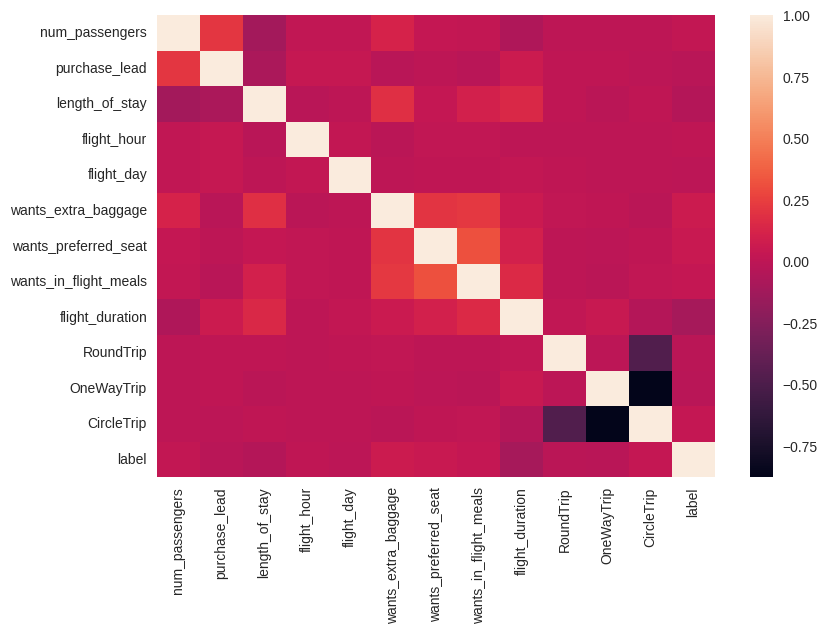

In [ ]:
#creating a correlation matrix
corr = scaled_df.corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr)

In [ ]:
#split, train, test
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:, :-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [ ]:
#function for fitting and predicting
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

#functions for accuracy
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)
def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)
def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [ ]:
#The model:Random Forest Classifier instance
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5)

In [ ]:
# training accuracy
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train), 2)
#accuracy score 
acc = round(accuracy_score(y_train, y_pred_train), 2)
#precision score
pre = round(precision_score(y_train, y_pred_train), 2)

print(f'The training data has F1-score of: {f1}, Accuracy score of: {acc}, Precision score of: {pre} ')

The training data has F1-score of: 0.73, Accuracy score of: 0.94, Precision score of: 1.0 


0.9356758784544205

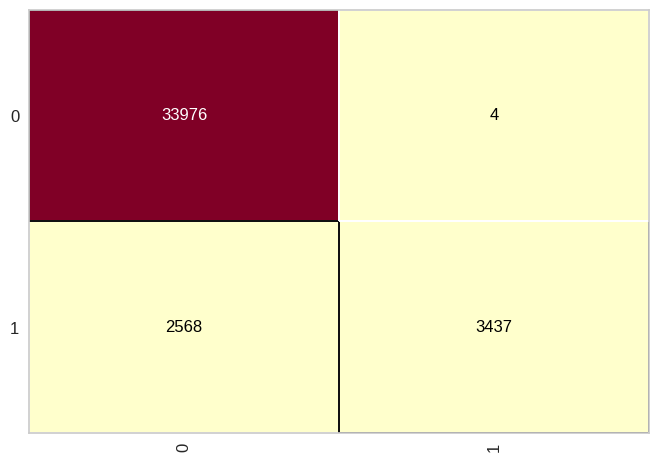

In [ ]:
#confusion matrix for training data
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

In [ ]:
# testing accuracy
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for testing data
f1 = round(f1_score(y_test, y_pred_test), 2)
#accuracy score 
acc = round(accuracy_score(y_test, y_pred_test), 2)
#precision score
pre = round(precision_score(y_test, y_pred_test), 2)

print(f'The testing data has F1-score of: {f1}, Accuracy score of: {acc}, Precision score of: {pre} ')

The testing data has F1-score of: 0.06, Accuracy score of: 0.85, Precision score of: 0.49 


The low F1 score is due to the imbalanced data

0.8527558267480244

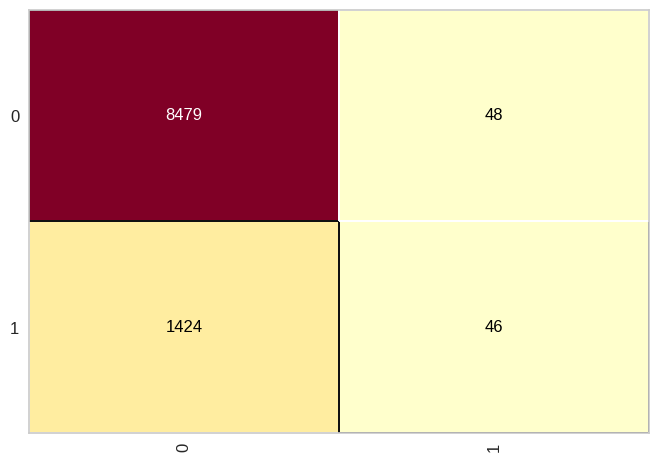

In [ ]:
#confusion matrix for testing data
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

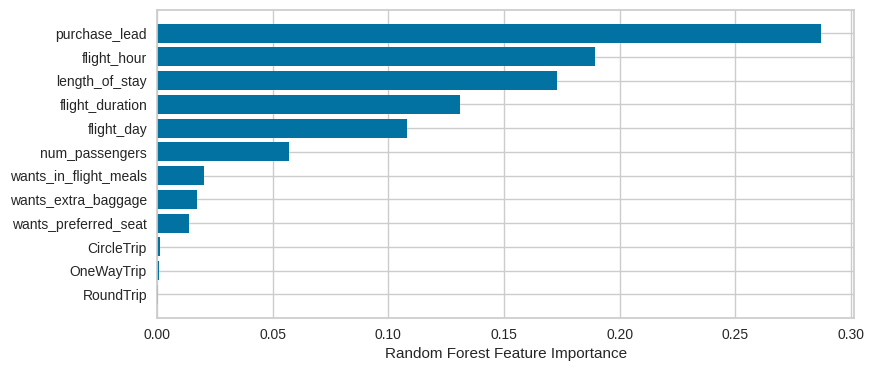

In [ ]:
#Seeing the most Important Features
plt.figure(figsize=(9,4))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

In [ ]:
#most entries are classified as 0 than 1 so we have to balance the data
scaled_df.label.value_counts()

0    42507
1     7475
Name: label, dtype: int64

In [ ]:
#df of all 0 labeled data
scaled_df_0 = scaled_df[scaled_df.label == 0].sample(n=8000)

#concat the 2 dfs
scaled_df_new = pd.concat([scaled_df[scaled_df.label == 1], scaled_df_0], ignore_index=True)

#shuffle df rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400594,-0.752607,-0.575877,0.542074,-1.412277,0.703619,-0.649929,-0.863380,0.870290,-0.048231,-0.088336,0.100826,0
1,-0.579556,0.156952,-0.119575,0.726832,1.598511,-1.421224,-0.649929,-0.863380,1.037308,-0.048231,-0.088336,0.100826,1
2,1.380745,0.778115,-0.575877,-1.675030,-0.408681,-1.421224,-0.649929,-0.863380,-0.439134,-0.048231,-0.088336,0.100826,0
3,1.380745,-0.419842,-0.515037,0.911591,-1.412277,0.703619,1.538629,1.158238,1.037308,-0.048231,-0.088336,0.100826,0
4,4.321196,1.876241,-0.545457,-1.305512,-1.412277,0.703619,-0.649929,1.158238,-0.439134,-0.048231,-0.088336,0.100826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15470,0.400594,-0.475303,0.184627,0.172556,1.096713,0.703619,1.538629,-0.863380,1.037308,-0.048231,-0.088336,0.100826,0
15471,-0.579556,-0.142537,-0.515037,0.726832,-0.910479,0.703619,-0.649929,-0.863380,-0.185266,-0.048231,-0.088336,0.100826,1
15472,-0.579556,-0.619501,0.093366,-0.566478,-0.910479,-1.421224,-0.649929,-0.863380,-1.107208,-0.048231,-0.088336,0.100826,0
15473,-0.579556,0.245690,-0.515037,0.726832,-0.910479,0.703619,-0.649929,-0.863380,0.870290,-0.048231,-0.088336,0.100826,1


In [ ]:
#splitting the data
X = scaled_df_new.iloc[:, :-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

clf_rf = RandomForestClassifier(n_estimators=50, max_depth=50, min_samples_split=5)

# training accuracy
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for testing data
f1 = round(f1_score(y_test, y_pred_test), 2)
#accuracy score 
acc = round(accuracy_score(y_test, y_pred_test), 2)
#precision score
pre = round(precision_score(y_test, y_pred_test), 2)

recall = round(recall_score(y_test, y_pred_test), 2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0), 2)

print(f'The testing data has F1-score of: {f1}, Accuracy score of: {acc}, Precision score of: {pre}, Recall score of: {recall}, Specificity score of: {specificity} ')

The testing data has F1-score of: 0.6, Accuracy score of: 0.61, Precision score of: 0.6, Recall score of: 0.59, Specificity score of: 0.63 


0.6109854604200323

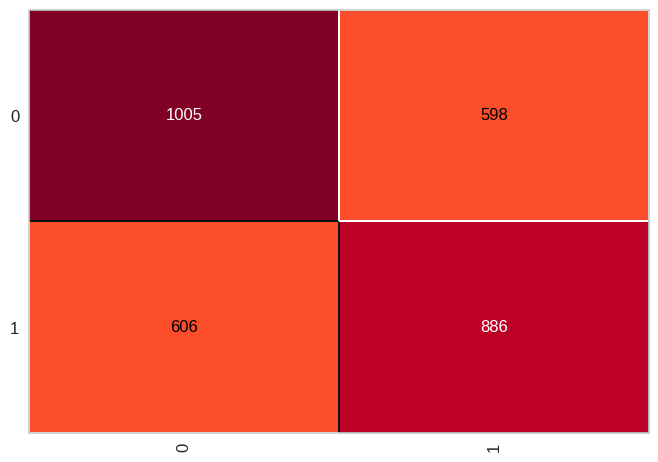

In [ ]:
#confusion matrix 
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

The reds are what is predicted accurately, the oranges are not true...false positive(right) and false negative(left)

Text(0.5, 0, 'Random Forest Feature Importance')

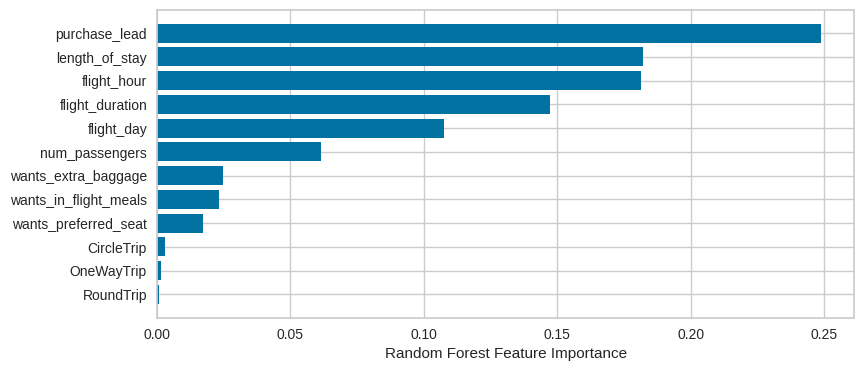

In [ ]:
#Seeing the most Important Features
plt.figure(figsize=(9,4))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')